In [70]:
# import some libraries

# loading libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

In [2]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [3]:
#!pip3 install -U scikit-learn
import sklearn
from sklearn import model_selection

# load data

In [4]:
!ls data/

Untitled.html  Untitled.ipynb  sample_submission.csv  test.csv	train.csv


In [5]:
train = pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
sample_submission =pd.read_csv('data/sample_submission.csv')

In [6]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


In [7]:
sample_submission.reset_index(drop=True,inplace=True)

In [8]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


In [9]:
#train.head()

In [10]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [11]:
train_data = train.iloc[:,1:].values
train_label= train.iloc[:,:1].values
test_data = test.iloc[:,:].values

In [12]:
train_data_shape = train_data.shape

In [13]:
len(train_data)

42000

In [14]:
train_data =train_data.reshape(len(train_data),28,28,1)
test_data =test_data.reshape(len(test_data),28,28,1)
train_label = keras.utils.to_categorical(train_label,10)

In [15]:
train_data.shape,train_label.shape,test_data.shape

((42000, 28, 28, 1), (42000, 10), (28000, 28, 28, 1))

In [16]:
x_train,x_valid,y_train,y_valid=model_selection.train_test_split(train_data,train_label,test_size=0.2,random_state=42)

In [13]:
#x_train.shape,x_valid.shape,y_train.shape,y_valid.shape

# model

## simple MLP

In [107]:
input1 = keras.layers.Input(shape=(28,28,1))
x = keras.layers.Flatten()(input1)
#x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64,activation='relu')(x)
x= keras.layers.Dropout(0.3)(x)
x= keras.layers.Dense(32,activation='relu')(x)
x = keras.layers.Dropout(.1)(x)
output1= keras.layers.Dense(10,activation='softmax')(x)
mlp_model= keras.models.Model(inputs= input1,outputs=output1)

In [108]:
mlp_model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                330

In [109]:
train_datagen= keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow(train_data,train_label,batch_size=32)
valid_datagen= keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
valid_generator = train_datagen.flow(x_valid,y_valid,batch_size=32)

In [110]:
loss= keras.losses.CategoricalCrossentropy()
optimizer=keras.optimizers.Adam(learning_rate=.01)
mlp_model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
mlp_model.fit(train_generator,epochs=2,validation_data=valid_generator)

Train for 1313 steps, validate for 263 steps
Epoch 1/2
1313/1313 [==============================] - 10s 8ms/step - loss: 0.5162 - accuracy: 0.8398 - val_loss: 0.2254 - val_accuracy: 0.9335
Epoch 2/2
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3752 - accuracy: 0.8896 - val_loss: 0.1969 - val_accuracy: 0.9381


In [111]:
loss= keras.losses.CategoricalCrossentropy()
optimizer=keras.optimizers.Adam(learning_rate=.001)
mlp_model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
mlp_model.fit(train_generator,epochs=5,validation_data=valid_generator)

Train for 1313 steps, validate for 263 steps
Epoch 1/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2616 - accuracy: 0.9223 - val_loss: 0.1361 - val_accuracy: 0.9611
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2335 - accuracy: 0.9302 - val_loss: 0.1215 - val_accuracy: 0.9638
Epoch 3/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2208 - accuracy: 0.9343 - val_loss: 0.1154 - val_accuracy: 0.9651
Epoch 4/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2085 - accuracy: 0.9379 - val_loss: 0.1143 - val_accuracy: 0.9656
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2027 - accuracy: 0.9390 - val_loss: 0.1029 - val_accuracy: 0.9692


In [112]:
loss= keras.losses.CategoricalCrossentropy()
optimizer=keras.optimizers.Adam(learning_rate=.0001)
mlp_model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
mlp_model.fit(train_generator,epochs=5,validation_data=valid_generator)

Train for 1313 steps, validate for 263 steps
Epoch 1/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.1872 - accuracy: 0.9434 - val_loss: 0.0993 - val_accuracy: 0.9698
Epoch 2/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1910 - accuracy: 0.9416 - val_loss: 0.0989 - val_accuracy: 0.9707
Epoch 3/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1883 - accuracy: 0.9430 - val_loss: 0.0976 - val_accuracy: 0.9706
Epoch 4/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1849 - accuracy: 0.9439 - val_loss: 0.0972 - val_accuracy: 0.9711
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1872 - accuracy: 0.9429 - val_loss: 0.0963 - val_accuracy: 0.9706


In [113]:
loss= keras.losses.CategoricalCrossentropy()
optimizer=keras.optimizers.Adam(learning_rate=.00001)
mlp_model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
mlp_model.fit(train_generator,epochs=5,validation_data=valid_generator)

Train for 1313 steps, validate for 263 steps
Epoch 1/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1854 - accuracy: 0.9424 - val_loss: 0.0961 - val_accuracy: 0.9702
Epoch 2/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1838 - accuracy: 0.9434 - val_loss: 0.0961 - val_accuracy: 0.9701
Epoch 3/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1843 - accuracy: 0.9423 - val_loss: 0.0959 - val_accuracy: 0.9702
Epoch 4/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1844 - accuracy: 0.9432 - val_loss: 0.0958 - val_accuracy: 0.9702
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1821 - accuracy: 0.9444 - val_loss: 0.0958 - val_accuracy: 0.9702


In [114]:
loss= keras.losses.CategoricalCrossentropy()
optimizer=keras.optimizers.Adam(learning_rate=.000001)
mlp_model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
mlp_model.fit(train_generator,epochs=5,validation_data=valid_generator)

Train for 1313 steps, validate for 263 steps
Epoch 1/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1837 - accuracy: 0.9445 - val_loss: 0.0957 - val_accuracy: 0.9702
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1836 - accuracy: 0.9440 - val_loss: 0.0957 - val_accuracy: 0.9702
Epoch 3/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1827 - accuracy: 0.9430 - val_loss: 0.0957 - val_accuracy: 0.9702
Epoch 4/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1823 - accuracy: 0.9442 - val_loss: 0.0957 - val_accuracy: 0.9702
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1864 - accuracy: 0.9438 - val_loss: 0.0957 - val_accuracy: 0.9702


## convolutional neural network

In [14]:
keras.__version__

'2.2.4-tf'

In [64]:
def model():
    input1= keras.layers.Input(shape=(28,28,1,))
    x = keras.layers.BatchNormalization()(input1)
    x= keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same')(x)
    x= keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same')(x)
    x = keras.layers.MaxPool2D(pool_size=2)(x)
    x = keras.layers.BatchNormalization()(x)
    x= keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same')(x)
    x= keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same')(x)
    x = keras.layers.MaxPool2D(pool_size=2)(x)
    x = keras.layers.BatchNormalization()(x)
    x= keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same')(x)
    x= keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same')(x)
    x = keras.layers.MaxPool2D(pool_size=2)(x)
    x = keras.layers.BatchNormalization()(x)
    x= keras.layers.Flatten()(x)
    x = keras.layers.Dropout(0.5)(x)
    x= keras.layers.Dense(64,activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.5)(x)
    x= keras.layers.Dense(64,activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.2)(x)
    output1= keras.layers.Dense(10,activation='softmax')(x)
    conv_model= keras.models.Model(inputs=input1,outputs=output1)
    return conv_model

In [65]:
conv_model= model()

In [66]:
conv_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 64)        1849

In [67]:
train_datagen= keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,rotation_range=0.20,
                       height_shift_range=0.20,width_shift_range=0.20,zoom_range=0.20)
train_generator = train_datagen.flow(x_train,y_train,batch_size=32)
valid_datagen= keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
valid_generator = train_datagen.flow(x_valid,y_valid,batch_size=32)

In [68]:
# This function keeps the initial learning rate for the first ten epochs  
# and decreases it exponentially after that.  
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.math.exp(-0.1)

In [69]:
loss= keras.losses.CategoricalCrossentropy()
optimizer=keras.optimizers.Adam(learning_rate=.01)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
conv_model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
conv_model.fit(train_generator,epochs=50,validation_data=valid_generator,callbacks=[callback])

Train for 1050 steps, validate for 263 steps
Epoch 1/50
1050/1050 [==============================] - 34s 32ms/step - loss: 0.9206 - accuracy: 0.6964 - val_loss: 0.5306 - val_accuracy: 0.8480
Epoch 2/50
1050/1050 [==============================] - 31s 30ms/step - loss: 0.4351 - accuracy: 0.8667 - val_loss: 0.2668 - val_accuracy: 0.9179
Epoch 3/50
1050/1050 [==============================] - 31s 30ms/step - loss: 0.3475 - accuracy: 0.8956 - val_loss: 0.1794 - val_accuracy: 0.9448
Epoch 4/50
1050/1050 [==============================] - 31s 29ms/step - loss: 0.3085 - accuracy: 0.9077 - val_loss: 0.2064 - val_accuracy: 0.9340
Epoch 5/50
1050/1050 [==============================] - 31s 30ms/step - loss: 0.2790 - accuracy: 0.9181 - val_loss: 0.1342 - val_accuracy: 0.9575
Epoch 6/50
1050/1050 [==============================] - 32s 30ms/step - loss: 0.2593 - accuracy: 0.9243 - val_loss: 0.1619 - val_accuracy: 0.9489
Epoch 7/50
1050/1050 [==============================] - 31s 30ms/step - loss: 0

# submission

## train on full data

In [86]:
datagen= keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,rotation_range=0.20,
                       height_shift_range=0.20,width_shift_range=0.20,zoom_range=0.20)
generator = train_datagen.flow(train_data,train_label,batch_size=128)

In [92]:
# This function keeps the initial learning rate for the first ten epochs  
# and decreases it exponentially after that.  
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.math.exp(-0.1)

In [93]:
.009* np.math.exp(-0.1)

0.008143536762323635

In [94]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [95]:
conv_model = model()

In [96]:
loss= keras.losses.CategoricalCrossentropy()
optimizer=keras.optimizers.Adam(learning_rate=.01)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
conv_model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
conv_model.fit(generator,epochs=80,callbacks=[callback])

Train for 329 steps
Epoch 1/80
329/329 [==============================] - 26s 78ms/step - loss: 0.9108 - accuracy: 0.6907
Epoch 2/80
329/329 [==============================] - 23s 71ms/step - loss: 0.4331 - accuracy: 0.8680
Epoch 3/80
329/329 [==============================] - 23s 70ms/step - loss: 0.3398 - accuracy: 0.8990
Epoch 4/80
329/329 [==============================] - 23s 70ms/step - loss: 0.2549 - accuracy: 0.9241
Epoch 5/80
329/329 [==============================] - 22s 67ms/step - loss: 0.2317 - accuracy: 0.9318
Epoch 6/80
329/329 [==============================] - 22s 68ms/step - loss: 0.2084 - accuracy: 0.9383
Epoch 7/80
329/329 [==============================] - 23s 69ms/step - loss: 0.1890 - accuracy: 0.9446
Epoch 8/80
329/329 [==============================] - 24s 72ms/step - loss: 0.1805 - accuracy: 0.9475
Epoch 9/80
329/329 [==============================] - 23s 69ms/step - loss: 0.1623 - accuracy: 0.9520
Epoch 10/80
329/329 [==============================] - 22s 67m

In [97]:
conv_model.save('conv_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: conv_model/assets


In [98]:
conv_model.save_weights('conv_model_weights.h5')

## predict on test data

In [144]:
# test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
# test_generator = test_datagen.flow(test_data)

In [17]:
conv_model = load_model('conv_model')

In [ ]:
y_prob=conv_model.predict(test_data/255.0)
y_classes = np.argmax(y_prob,axis=-1)

In [ ]:
y_prob[3]

In [ ]:
y_classes[3]

In [ ]:
sample_submission.head()

In [ ]:
sample_submission['Label']=y_classes

In [ ]:
sample_submission.info()

In [ ]:
sample_submission.head()

In [151]:
sample_submission.to_csv('submission.csv')

In [152]:
x=next(test_generator)

In [153]:
import matplotlib.pyplot as plt

In [154]:
test_data[0].shape

(28, 28, 1)

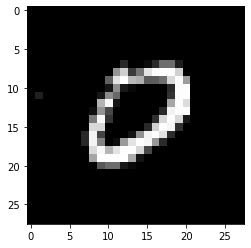

In [155]:
plt.imshow(test_data[3].reshape(28,28), cmap='gray')
plt.show()